11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/12
469/469 [==============================] - 171s 360ms/step - loss: 0.2284 - accuracy: 0.9305 - val_loss: 0.0534 - val_accuracy: 0.9833
Epoch 2/12
469/469 [==============================] - 158s 337ms/step - loss: 0.0850 - accuracy: 0.9755 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 3/12
469/469 [==============================] - 155s 330ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 4/12
469/469 [==============================] - 155s 330ms/step - loss: 0.0575 - accuracy: 0.9834 - val_loss: 0.0357 - val_accuracy: 0.9891
Epoch 5/12
469/469 [==============================] - 156s 332ms/step - loss: 0.0506 - accuracy: 0.9857 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 6/12
469/469 [==============================] - 153s 327ms/step - loss: 0.0468 - accuracy: 0.9870 - val_loss: 0.0305 - val_accuracy: 0.9906
Epoch 7/12
469/469 [==============================] - 154s 

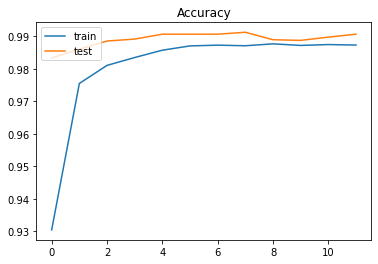

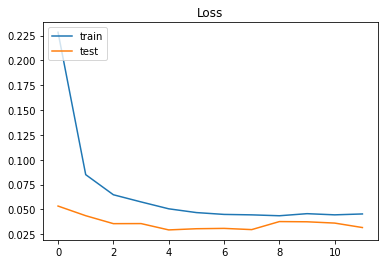

In [1]:
# CNNでMNISTの分類問題に挑戦
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# 2次元畳み込み層、マックスプーリング層
from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import utils as np_utils

# 入力と出力を指定
im_rows = 28 # 画像の縦ピクセルサイズ
im_cols = 28 # 画像の横ピクセルサイズ
im_color = 1 # 画像の色空間/グレイスケール
in_shape = (im_rows, im_cols, im_color) # 三次元のデータ
out_size = 10

# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 読み込んだデータをの三次元配列に変換(4階のテンソルに変換)
                              # 高さ     幅    チャネル数
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
y_train = np_utils.to_categorical(y_train.astype('int32'),10)
y_test = np_utils.to_categorical(y_test.astype('int32'),10)

# CNNモデル構造を定義
model = Sequential()
# Conv2D：畳み込み層
# Conv2D(32,kernel_size=(3, 3)→3*3のフィルタを3枚使う、という意味
model.add(Conv2D(32,kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D：プーリング層
# 2*2の大きさの最大プーリング層（4マスの中かから最大の値を取り出す）
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten：平滑化→多次元配列を一次元配列にしている(全結合層の前に入る)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

# モデルをコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
a = np.arange(24)
print(a)
print(a.reshape([4, -1]))
# 4行?列
print('3階のテンソル')

# 2回の行列、?行4列
print(a.shape([2, -1, 4]))
b = np.agange(24)
print(b)
print('4階のテンソル')

# 2枚の中がさらに2真に分かれていて、その中に3行2列が入っている
print(b.reshape(2, 2, 3, 2))